In [75]:
# Necessary imports
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [76]:
track_log_path = ['jungleTrack', 'lsdTrack']


#select correct column for csv
columns = ['centre cam', 'left cam' , 'right cam ', 'steering', 'throttle', 'brake', 'speed']

def parse_logs(track_log_path):
    '''
    Parse the driving logs, customise the image paths and concatenate all the logs in a single Pandas
    DataFrame
    :params log_paths: List of all the driving log paths
    :return: Pandas DataFrame
    '''
    frames = []
    for i, track_log_path in enumerate(track_log_path):
        df = pd.read_csv(track_log_path + '/driving_log.csv')
        global columns
        df.columns = columns
        
        for column in columns[:3]:
            df[column] = df[column].apply(lambda x: '/'.join(x.split('/')[-3:]))

        frames.append(df)
    return pd.concat(frames, ignore_index=True)

df = parse_logs(track_log_path)
image = cv2.imread(df.loc[0]['centre cam'].strip())

In [77]:
# Data set summarisation
print('Number of scene frames: {}'.format(len(df)))
print('Total frames (including the Left/Right prespectives): {}'.format(len(df) * 3))
print('Image shape: {}'.format(image.shape))

Number of scene frames: 3893
Total frames (including the Left/Right prespectives): 11679
Image shape: (160, 320, 3)


Number of scene frames: 3893
Avg # samples/bin: 155.72
Threshold 202


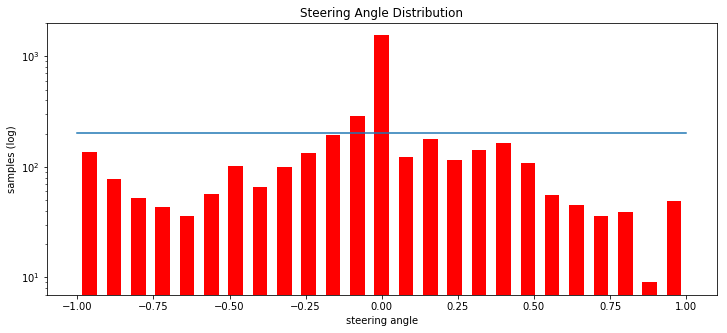

In [78]:
print('Number of scene frames: {}'.format(len(df)))

# Data set exploratory visualisation
# Visualising the steering angle distribution

#size of steering angle bins
binSize = 25 

hist, bins = np.histogram(df.steering, binSize)
center = (bins[:-1] + bins[1:])/2

plt.figure(figsize=(12,5))
plt.bar(center, hist, align='center', width=(bins[0] - bins[1])*0.6, log=True, fc='r', color='b')
plt.title('Steering Angle Distribution')
plt.ylabel('samples (log)')
plt.xlabel('steering angle')
avg_nb_samples = len(df['steering']) / binSize
threshold = int(avg_nb_samples * 1.3)
plt.plot((df['steering'].min(), df['steering'].max()), (threshold, threshold))

print('Avg # samples/bin: {}'.format(avg_nb_samples))
print('Threshold {}'.format(threshold))

## Description:
This is a graph of the steering angle recorded for each frame during a test drive around the: Lake Shore Drive track in the simulator. The Data is severly skewed towards the center which will give our neural networ very poor learning material. Balance and variety are very important to sufficiently train our model.
Reasons for skewed data: 
<ul>
<li>Track, This course contains a lot of straights or gently turns meaning it doesn't require as many extreme steering angles</li>
<li>Sample Size, This data is from one lap, around one track, in one direction. To accomplish a more balanced sample set we will need to record multiple laps on different tracks and in different directions</li>
<li>Specialisation, This was a recording of a normal lap around the track but we may want to record particular turns or environments multiple times such as sharp bends. It would have undoubtedly helped balance out the data in this case.</li>
<li>Data Selection, This is the whole set of data recorded in one lap and as we have discussed it is very skewed towards the center because the track contains many straights. We could how ever decide to purposely omit data, such as the large number of low steering angles in this case, to have a more balanced training set </li>
</ul>
In the graph above we can also see the ideal amount of data wanted for a training set, a balenced amount of data on all steering angles would be more conducive to creating a self driving car neural network model.
<img src = "LSD_trackPhoto.png" style="width: 600px;" alt = "Image from Track"/> 

## Description:
This is the data recorded on the Jungle Track as you can see from a quick glance at the data it is much closer to the ideal distribution of steering angles for a self driving car training set. This track consists of a much larger number of turns. This track also includes a number of other features not taken into account yet such as gradient and surrounding environment. The steep hills and darker areas (in the shade or under a bridge) will need to be included in the training set aswell. If we don't have training data for these environments the model will not be able to make a correct steering decision. 

However this data is still not ideal for training. Next step is to collect a larger quantity of data and select the relevant data e.g. balanced number of steering angles and a variety of environments.

<img src = "jungle_trackPhoto.png" style="width: 600px;" alt = "Image from Track"/> 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as FF
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Read in data
df = pd.read_csv('jungle_earlyData.csv')
#select correct column for csv
angle_list=df['angle']
speed_list=df['speed']
speed=np.array(speed_list)
angle=np.array(angle_list)
#np.sort(angle)


#create a numpy histogram from the data
hist_data = np.histogram(angle_list)
#define bin sizes for histogram based on dataset
binsize = hist_data[1][1] - hist_data[1][0]

hist_data2 = np.histogram(speed_list)
#define bin sizes for histogram based on dataset
binsize2 = hist_data2[1][1] - hist_data2[1][0]


trace1 = go.Histogram(
    x=angle_list,
    histnorm='count',
    name='Steering Angle',
    autobinx=False,
    xbins=dict(
        start=hist_data[1][0],
        end=hist_data[1][-1],
        size=binsize
    )
)

trace2 = go.Scatter(
    name='Ideal Data Amount',
    y=[300,300],
    x=[-1,1]
)

trace3 = go.Scatter(
    name='Speed',
    y=speed,
    x=angle,
    mode='markers',
    yaxis='y2'
)



data = [trace1,trace2,trace3]

layout = go.Layout(
    bargroupgap=0.3,
    title='Welcome to the Jungle Track Data',
    xaxis=dict(title='Steering Angle'),
    
    yaxis=dict(title='Frames'),
    
    yaxis2=dict(
        title='Speed',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        anchor='x',
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)



FileNotFoundError: File b'jungle_earlyData.csv' does not exist

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as FF
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Read in data
df = pd.read_csv('meg_driving.csv')
#select correct column for csv
angle_list=df['angle']

#create a numpy histogram from the data
hist_data = np.histogram(angle_list)
#define bin sizes for histogram based on dataset
binsize = hist_data[1][1] - hist_data[1][0]


trace1 = go.Histogram(
    x=angle_list,
    histnorm='count',
    name='Steering Angle',
    autobinx=False,
    xbins=dict(
        start=hist_data[1][0],
        end=hist_data[1][-1],
        size=binsize
    )
)

#Read in data
df = pd.read_csv('meg_driving1.csv')
#select correct column for csv
angle_list=df['angle']

#create a numpy histogram from the data
hist_data = np.histogram(angle_list)
#define bin sizes for histogram based on dataset
binsize = hist_data[1][1] - hist_data[1][0]


trace2 = go.Histogram(
    x=angle_list,
    histnorm='count',
    name='Steering Angle 1',
    autobinx=False,
    xbins=dict(
        start=hist_data[1][0],
        end=hist_data[1][-1],
        size=binsize
    )
)

trace3 = go.Scatter(
    name='Ideal Data Amount',
    y=[1000,1000],
    x=[-1,1]
)

data = [trace1,trace2]
layout = go.Layout(
    bargroupgap=0.001,
    title='Lake Shore Drive Track Data',
    xaxis=dict(title='Steering Angle'),
    yaxis=dict(title='Frames')
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

